# Web Scrapping Script for pulling data that is needed on the web



The aim of this notebook is to create a function that can be used for web scrapping anything one may find of interest. 

> In the example I am doing here I am scrapping data related to pharmacies in San Antonio Texas.   


*************************

What is web scrapping? 
Web scrapping works to call upon a webpage that is available online and extracting data from it using a script. The reason one would want to use a script is to quickly obtain information of interest that is online - which is beneficial when there is a large volume of data. 

The two libraries used will be "requests" and "beautifulsoup"

*************************

The "requests" module is used for making HTTP request to a specific URL and returns the response. 
When using this module there are built in methods such as GET, POST, PUT, PATH or, HEAD. 

In this case we are using the "GET" since we are trying to pull data. 

It is important to note that when using the "GET" method we should be getting a response with output of 'Response [200]'

************************

"beautifulsoup" is used to extract information from the HTML and XML files. It provides a parse tree and the function to navigate, search or modify this parse tree.


************************


Most of this is coming from the sources below - so if you have any questions please go to the links below: 
sources: 
1. https://www.geeksforgeeks.org/python-web-scraping-tutorial/

In [2]:
# call the required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import csv
 

## Define Website and Verify Connection

In [4]:
# first need to define a target website - so this will be a required variable in the script
website_url = 'https://www.rxlist.com/pharmacy/san-antonio-tx_pharmacies.htm'

# needing to use get attribute to see if there is a response
r = requests.get(website_url)

print(r)

print(r.content)

<Response [200]>
b'<!DOCTYPE html>\r\n<html xmlns="https://www.w3.org/1999/xhtml" lang="en" xml:lang="en">\r\n    <HEAD><!--ccm   -->\n\t\t\t\t<script id="cookieConsentScript" async src="https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/webmd-ccm/ccm_oo.min.js"></script>\r\n<meta charset="UTF-8">\r\n<script>\r\n    // Flag set to know we are using the newest Global Ads coded\r\n    var globalAsyncAdsCode = false;\r\n</script>\n<link rel="preconnect" href="https://securepubads.g.doubleclick.net" crossorigin>\n<link rel="preconnect" href="https://assets.adobedtm.com" crossorigin>\n<link rel="preconnect" href="https://img.webmd.com" crossorigin>\r\n<link rel="preconnect" href="https://images.rxlist.com">\r\n<link rel="preload" href="https://images.rxlist.com/fonts/open-sans-v20-latin/open-sans-v20-latin-regular.woff2" as="font" type="font/woff2" crossorigin>\r\n<link rel="preload" href="https://images.rxlist.com/fonts/open-sans-v20-latin/open-sans-v20-latin-600.woff2" as

In [3]:
# # print request object - not needed but I will use the .status_code in the function
# print(r.url)
# print(r.status_code)

# # parse through the HTML of the website - this is unless you want to see the HTML - but I recommend just going to the webpage and then right-click 'inspect' and see what you need
# soup = BeautifulSoup(r.content, 'html.parser')
# print(soup.prettify())

In [4]:
soup = BeautifulSoup(r.content, 'html.parser')

print(soup.title)

<title>Pharmacies in San Antonio Texas Find local including 24 HR Pharmacy Locations on RxList</title>


## Find the information that is needed

> one method is going to be shown here and used but this can be modified as needed

To perform this step one needs to inspect the web page of interest (right click - select "inspect" option)

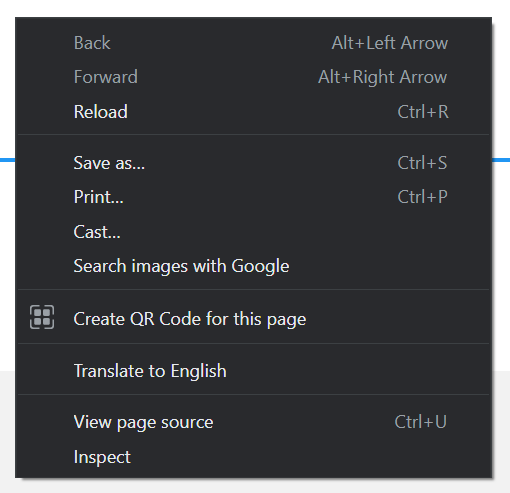


After the option is selected you can interact with the HTML content - to quickly view what is of interest click with your curser on the webpage which will then relocate your view on the HTML content to what is of interest/selected. 

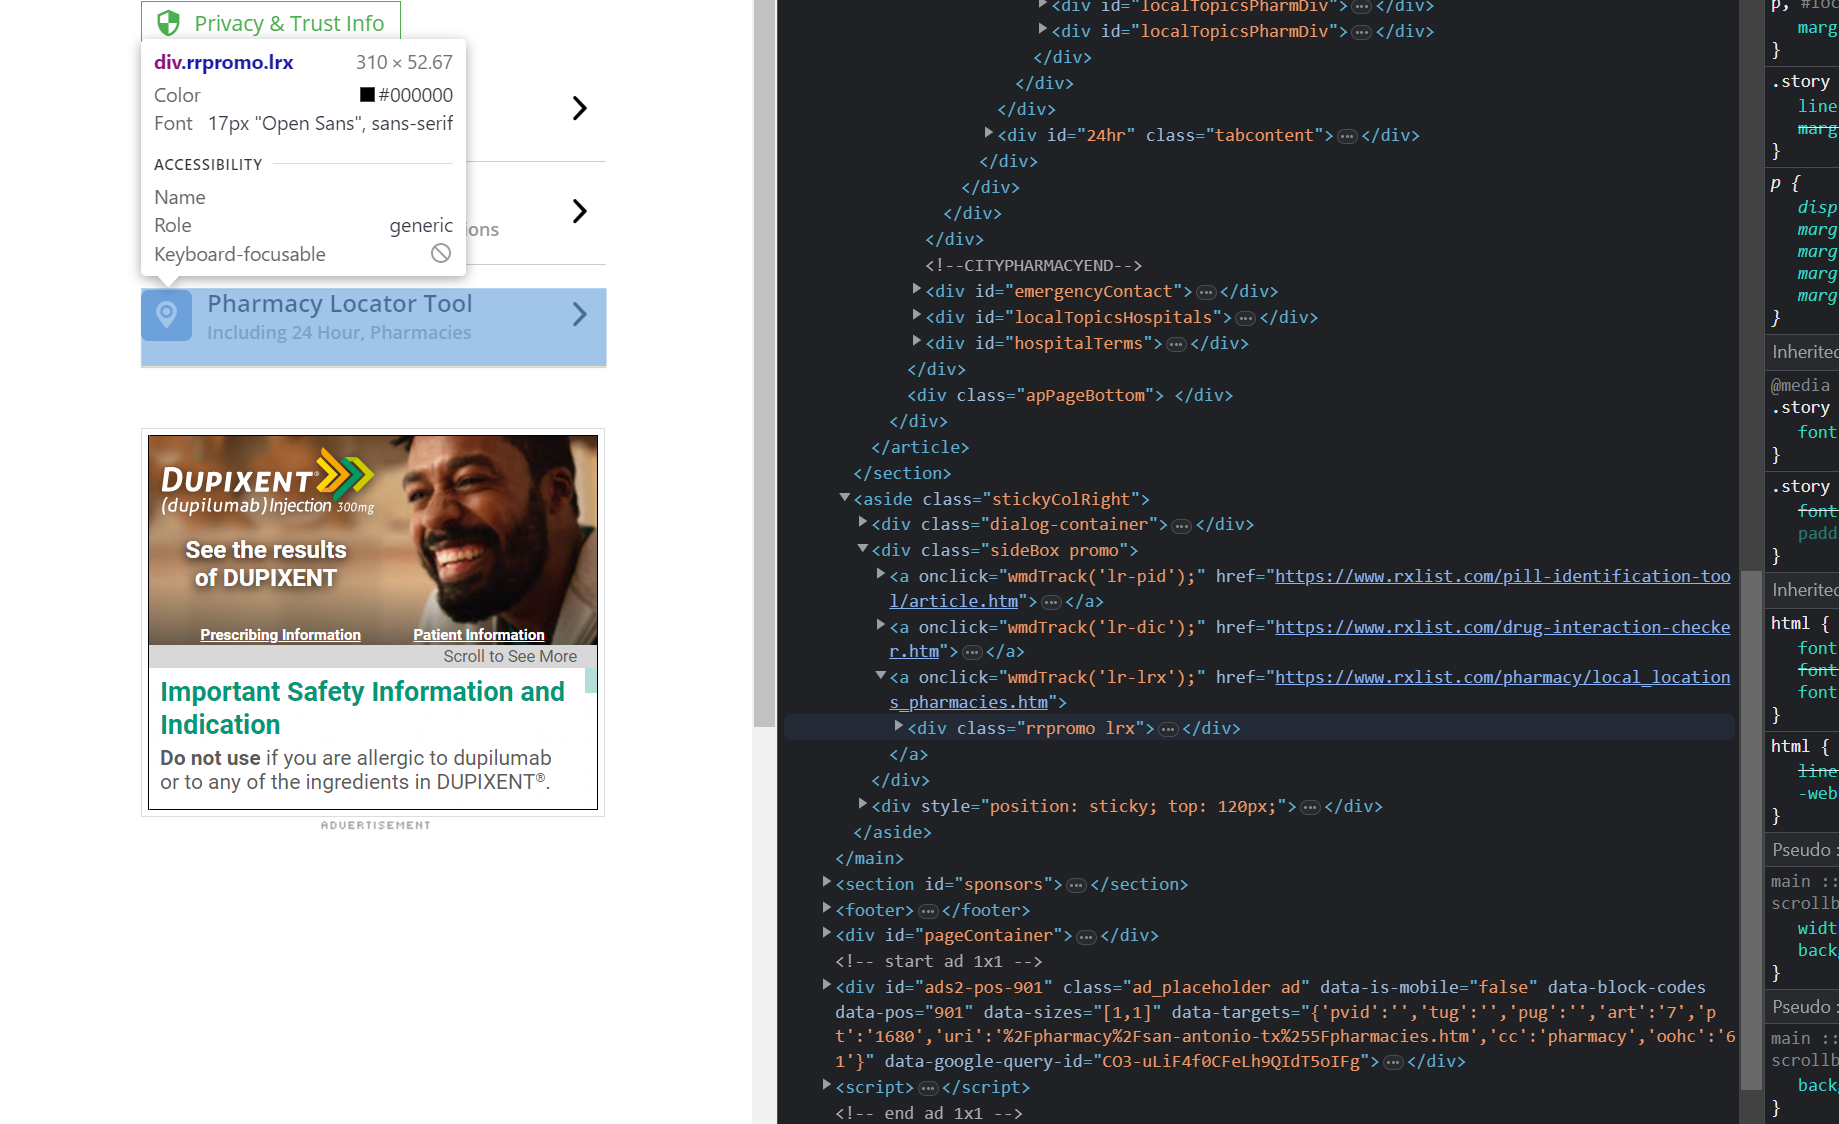

In this example I need to extract all the information regarding the pharmacies thus I need to identify where the data is stored in the HTML structure. 

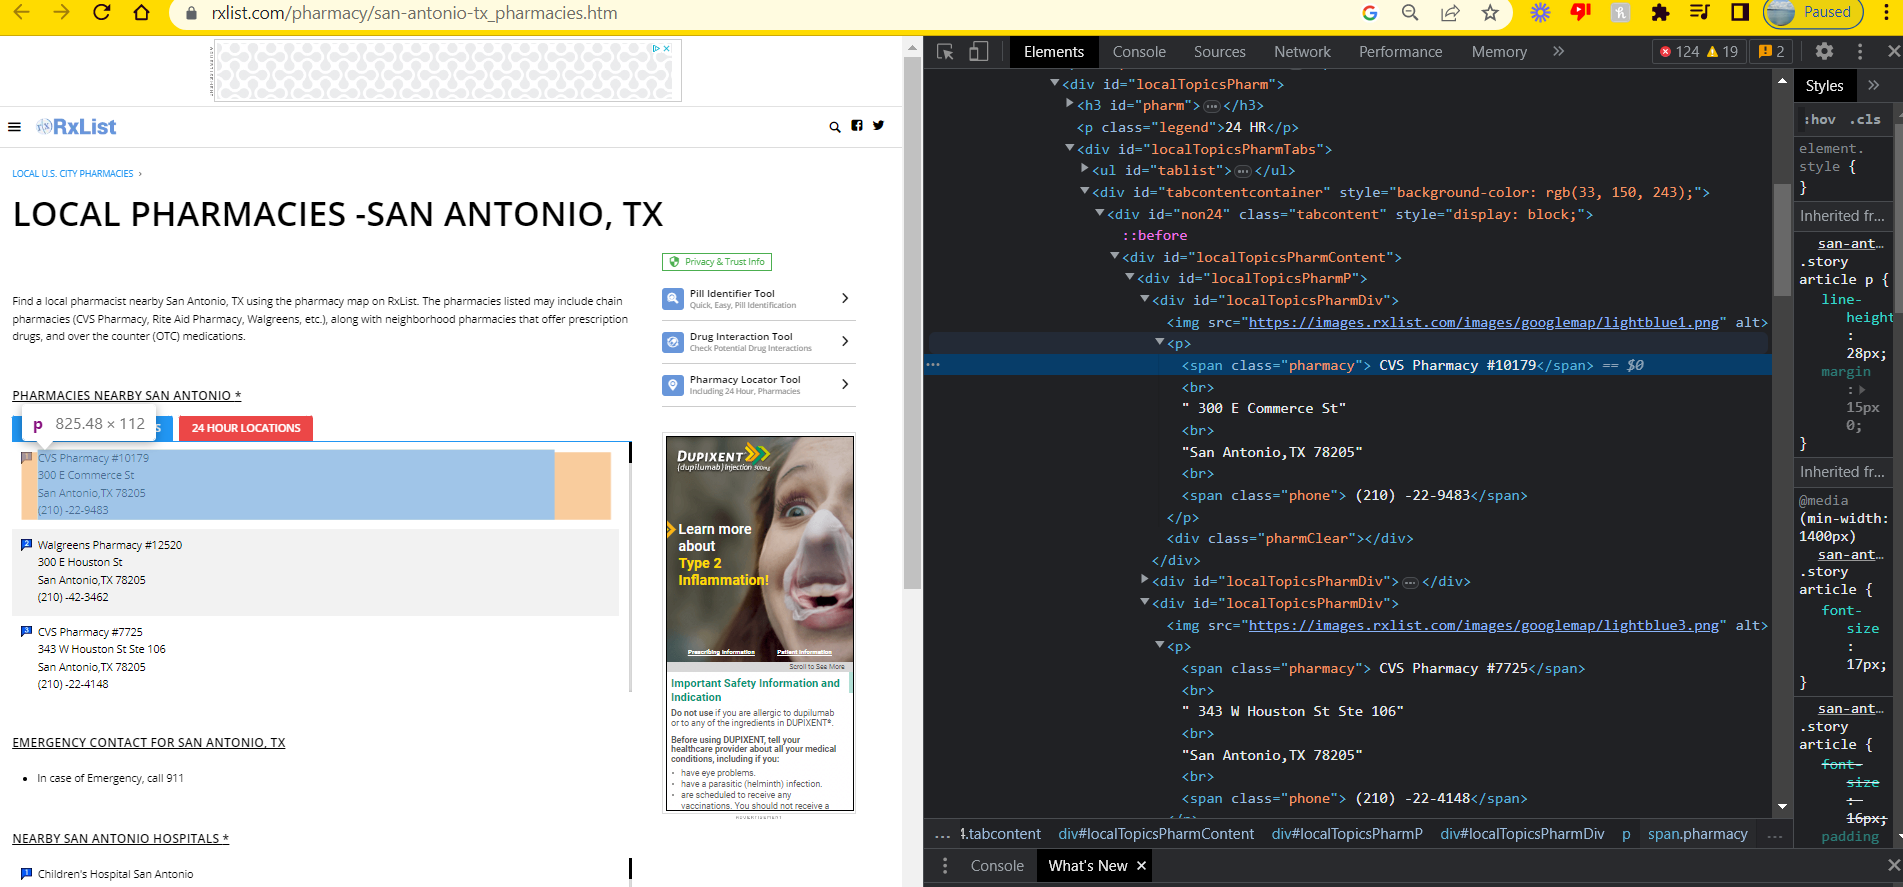

> In the image you can clearly see that the data is stored in class = 'pharmacy' and the name + address. 

In [20]:
# set a variable to find a specific location in the HTML structure defined by a criteria 
s = soup.find('div', class_='tabcontent')

# Within the defined HTML location define what section the content of interest is in, 
content = s.find_all('p')

# the data produced here is given but it is not usable as it still has HTML tags
print(content)


[<p><span class="pharmacy"> CVS Pharmacy #10179</span><br/> 300 E Commerce St<br/>San Antonio,TX 78205<br/><span class="phone"> (210) -22-9483</span></p>, <p><span class="pharmacy"> Walgreens Pharmacy #12520</span><br/> 300 E Houston St<br/>San Antonio,TX 78205<br/><span class="phone"> (210) -42-3462</span></p>, <p><span class="pharmacy"> CVS Pharmacy #7725</span><br/> 343 W Houston St Ste 106<br/>San Antonio,TX 78205<br/><span class="phone"> (210) -22-4148</span></p>, <p><span class="pharmacy"> Childrens Hospital San Antonio Inpatient Pharmacy</span><br/> 333 N Santa Rosa St<br/>San Antonio,TX 78207<br/><span class="phone"> (210) -70-2513</span></p>, <p><span class="pharmacy"> Life Care Pavilion Pharmacy</span><br/> 315 N San Saba Ste 110<br/>San Antonio,TX 78207<br/><span class="phone"> (210) -21-7455</span></p>, <p><span class="pharmacy"> University Health Center Downtown Pharmacy</span><br/> 903 W Martin St<br/>San Antonio,TX 78207<br/><span class="phone"> (210) -35-5989</span></p>

In [24]:
# need to remove HTML tags
for x in content: 
    print(x.text)

 CVS Pharmacy #10179 300 E Commerce StSan Antonio,TX 78205 (210) -22-9483
 Walgreens Pharmacy #12520 300 E Houston StSan Antonio,TX 78205 (210) -42-3462
 CVS Pharmacy #7725 343 W Houston St Ste 106San Antonio,TX 78205 (210) -22-4148
 Childrens Hospital San Antonio Inpatient Pharmacy 333 N Santa Rosa StSan Antonio,TX 78207 (210) -70-2513
 Life Care Pavilion Pharmacy 315 N San Saba Ste 110San Antonio,TX 78207 (210) -21-7455
 University Health Center Downtown Pharmacy 903 W Martin StSan Antonio,TX 78207 (210) -35-5989
 Kindred Hospital Inpatient Pharmacy 111 Dallas StSan Antonio,TX 78205 (210) -29-7175
 Avita Pharmacy 303 N Frio St Ste 102San Antonio,TX 78207 (210) -23-0383
 Garza Pharmacy At Madison Square 311 Camden St Ste 103San Antonio,TX 78215 (210) -22-4561
 Correctional Health Care Pharmacy 200 N ComalSan Antonio,TX 78207 (210) -33-6265
 Acuity Hospital Of South Texas Inpatient 718 Lexington AveSan Antonio,TX 78212 (210) -57-4635
 Walgreens Pharmacy #3140 410 W Cypress StSan Antoni

In [32]:
locations = []

count = 1 
for x in content:
    d = {}
    d['Location Number'] = f'Location {count}'
    d['Location information'] = x.text
    count += 1
    locations.append(d)

In [37]:
filename = 'pharmacies.csv'
with open(filename, 'w', newline='') as f:
    w = csv.DictWriter(f,['Location Number','Location information'])
    w.writeheader()
     
    w.writerows(locations)

## Web Scrapping Function

In [1]:
# creating the function
def website_script(web_url, div_loc, class_loc, spec_loc): 
    r = requests.get(web_url)
    # test connection is working and should get "Response [200]" --- 
    print(r.status_code) 
    # prints content - not useful but verify if the website is working
    print(r.content)

    # use beautifulsoup
    soup = BeautifulSoup(r.content, 'html.parser')
    print(soup.title)

    # define the HTML location of the data 
    s = soup.find(div_loc, class_=class_loc)
    # within the HTML location where exactly is the data stored
    content = s.find_all(spec_loc)
    
    empty_list = []
    count = 1
    for x in content:
        d = {}
        d['Data Number'] = f'Count {count}'
        d['Data information'] = x.text
        count += 1
        empty_list.append(d)

    filename = 'extracted_data.csv'
    with open(filename, 'w', newline='') as f:
        w = csv.DictWriter(f,['Data Number','Data information'])
        w.writeheader()
     
        w.writerows(empty_list)


    
    

In [5]:
website_script(website_url, 'div', 'tabcontent', 'p')

200
b'<!DOCTYPE html>\r\n<html xmlns="https://www.w3.org/1999/xhtml" lang="en" xml:lang="en">\r\n    <HEAD><!--ccm   -->\n\t\t\t\t<script id="cookieConsentScript" async src="https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/webmd-ccm/ccm_oo.min.js"></script>\r\n<meta charset="UTF-8">\r\n<script>\r\n    // Flag set to know we are using the newest Global Ads coded\r\n    var globalAsyncAdsCode = false;\r\n</script>\n<link rel="preconnect" href="https://securepubads.g.doubleclick.net" crossorigin>\n<link rel="preconnect" href="https://assets.adobedtm.com" crossorigin>\n<link rel="preconnect" href="https://img.webmd.com" crossorigin>\r\n<link rel="preconnect" href="https://images.rxlist.com">\r\n<link rel="preload" href="https://images.rxlist.com/fonts/open-sans-v20-latin/open-sans-v20-latin-regular.woff2" as="font" type="font/woff2" crossorigin>\r\n<link rel="preload" href="https://images.rxlist.com/fonts/open-sans-v20-latin/open-sans-v20-latin-600.woff2" as="font" type=